# Data Validation: Anatomical Registration Verification

This notebook verifies that lesion maps are properly registered to the standard MNI space by visualizing the mean lesion map overlaid on the MNI template.

In [1]:
import pandas as pd
from nilearn import image, plotting, datasets

/home/bradl/miniconda3/envs/Halothon/lib/python3.12/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


In [6]:
# Load a sample of the data
train_df = pd.read_csv("../data/processed/train.csv")
sample_df = train_df.sample(n=100, random_state=42)

print(f"Loaded {len(train_df)} training samples")
print(f"Using {len(sample_df)} samples for visualization")

Loaded 2883 training samples
Using 500 samples for visualization


In [9]:
# Compute the mean of the lesion maps
mean_lesion_img = image.mean_img(sample_df["lesion_filepath"].tolist())

print("Mean lesion image computed successfully")
print(f"Image shape: {mean_lesion_img.shape}")
print(f"Image affine: {mean_lesion_img.affine}")

/tmp/ipykernel_140980/2148652728.py:2: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  mean_lesion_img = image.mean_img(sample_df["lesion_filepath"].tolist())


Mean lesion image computed successfully
Image shape: (91, 109, 91)
Image affine: [[  -2.    0.    0.   90.]
 [   0.    2.    0. -126.]
 [   0.    0.    2.  -72.]
 [   0.    0.    0.    1.]]


In [10]:
# Load the MNI template
mni_template = datasets.load_mni152_template(resolution=2)

print("MNI template loaded successfully")
print(f"Template shape: {mni_template.shape}")
print(f"Template affine: {mni_template.affine}")

MNI template loaded successfully
Template shape: (99, 117, 95)
Template affine: [[   2.    0.    0.  -98.]
 [   0.    2.    0. -134.]
 [   0.    0.    2.  -72.]
 [   0.    0.    0.    1.]]


Plotting mean lesion map on MNI template...


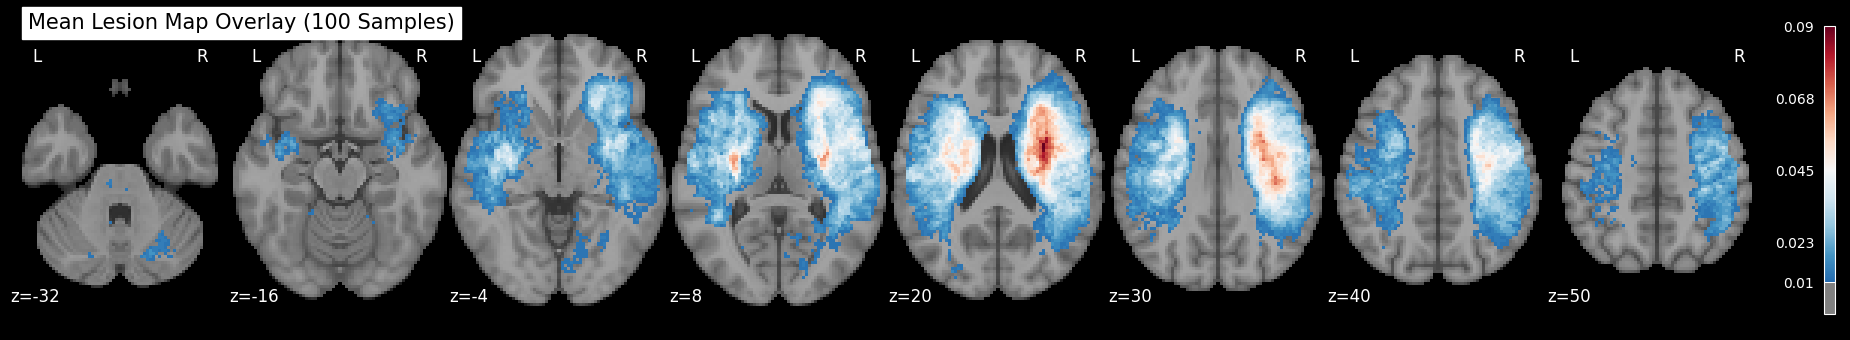

In [11]:
# Plot the overlay
print("Plotting mean lesion map on MNI template...")
plotting.plot_stat_map(
    mean_lesion_img,
    bg_img=mni_template,
    title="Mean Lesion Map Overlay (100 Samples)",
    display_mode="z",
    cut_coords=8,
    threshold=0.01,  # Threshold to show only regions with >1% lesion frequency
    colorbar=True,
)
plotting.show()

## Validation Results

**Expected Outcome:** The mean lesion map should appear as a "cloud" clearly situated within the brain boundaries of the MNI template, respecting major anatomical structures.

**Action Required:** Visually inspect the plot above. If the lesion cloud is shifted, nonsensical, or doesn't respect anatomical boundaries, this indicates a critical data quality issue that must be addressed before proceeding with atlas-based modeling.